#### In this notebook, we will show you how to prepare data for the machine learning analysis.

#### Example 1: Extract Data From USGS (United States Geological Survey) 

In this example, we are going select data from USGS's Mineral Resources Data System (MRDS)

The file mrds.csv can be found at [https://mrdata.usgs.gov/mrds/mrds-csv.zip](https://mrdata.usgs.gov/mrds/mrds-csv.zip)

If you are using the Docker container image provided by us, the file is at /data/mrds.csv.

#### mineral names 
* 'Graphite', 'Sulfur-Pyrite', 'Gold', 'Fluorine-Fluorite', 'Vermiculite', 'Refiner', 
* 'Sulfur', 'Mercury', 'Refinery', 'Gallium', 'Limestone', 'Arsenic', 'Osmium', 'Cadmium', 
* 'Copper Sulfide', 'Lead', 'Iron-Pyrite', 'Palladium', 'Silica', 'PGE', 'Smelter', 'Construction', 
* 'Boron-Borates', 'Bismuth', 'Asbestos', 'Ruthenium', 'Copper', 'Radium', 'Uranium', 'Wollastonite', 
* 'Indium', 'Iron', 'Corundum', 'Pyrite', 'Titanium', 'Feldspar', 'Rhodium', 'Mica', 'Strontium', 
* 'Barium-Barite', 'Gilsonite', 'Nickel', 'Free', 'Iridium', 'Coal', 'Garnet', 'Selenium', 'Copper Oxide', 
* 'General', 'Thorium', 'Rhenium', 'Sand and Gravel', 'Niobium (Columbium)', 'Tellurium', 'Tungsten', 
* 'Talc-Soapstone', 'Quartz', 'Stone', 'Nickel Laterite', 'Magnesite', 'Water', 'Gemstone', 'Perlite', 
* 'Germanium', 'Calcium', 'Zinc', 'Platinum', 'Molybdenum', 'Zirconium', 'Crushed/Broken', 'Pig Iron', 
* 'Chromium', 'Clay', 'Silver', 'Salt', 'Kaolin', 'Dimension', 'Tin', 'Aluminum', 'REE', 'Gypsum-Anhydrite', 
* 'Semiprecious Gemstone', 'Metal', 'Emery', 'Beryllium', 'Tantalum', 'Rubidium', 'Antimony', 
* 'Phosphorus-Phosphates', 'Lithium', 'Manganese', 'Sulfuric Acid', 'Cobalt', 'Vanadium'

loading data...
query data...
9627
saving file...


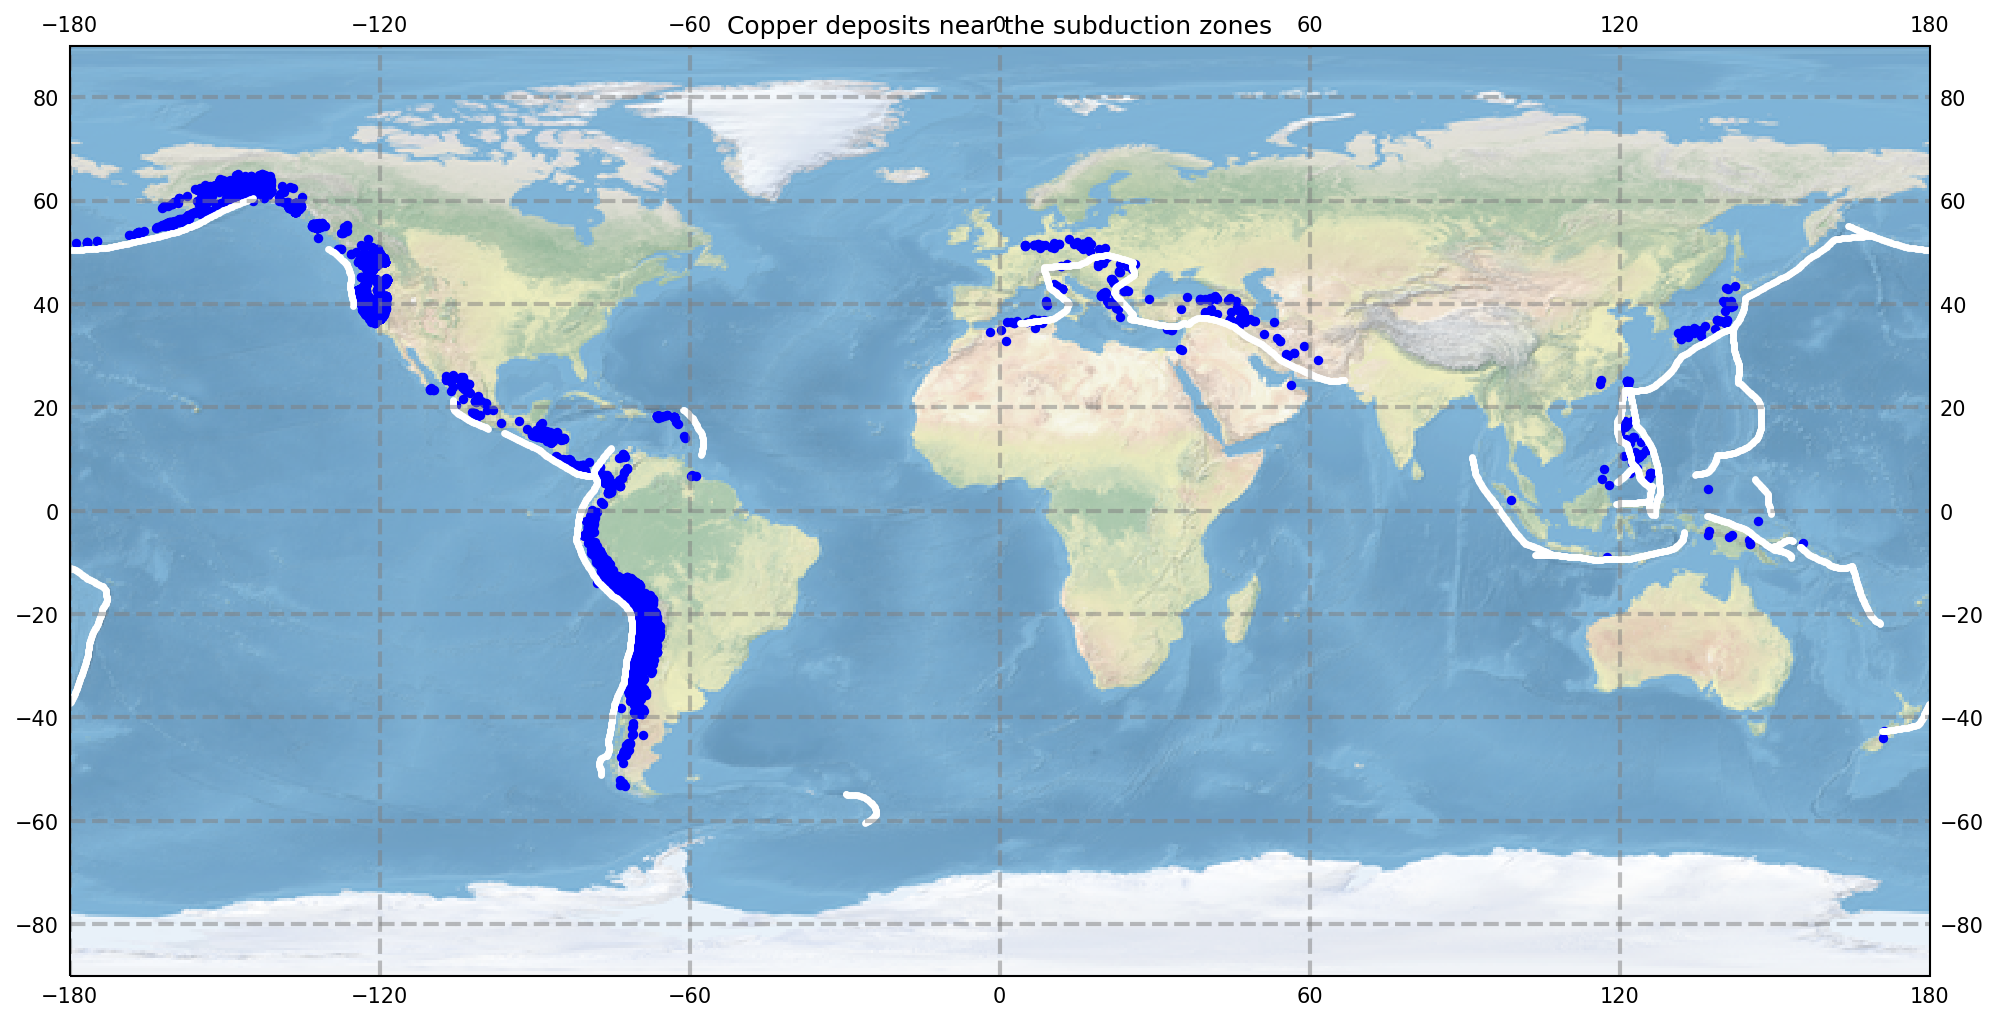

In [2]:
%matplotlib inline

import requests, os

import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

import extract_data_from_mrds

mrds_file = 'mrds.csv'
#if mrds.csv does not exist, download it from earthbyte.org.
if not os.path.isfile(mrds_file):
    if os.path.isfile('/data/mrds.csv'):
        earth_chem_file = '/data/mrds.csv'
    else:
        print(f'downloading {mrds_file}')
        myfile = requests.get('https://www.earthbyte.org/webdav/ftp/earthbyte/MRDS/mrds.csv')
        open(mrds_file, 'wb').write(myfile.content)

#extract data
extract_data_from_mrds.main(
    mrds_file, #input file name
    'mrds_copper', #output file name
    'Copper', #mineral name, see above list
    5 #region of interest (in degrees)
)



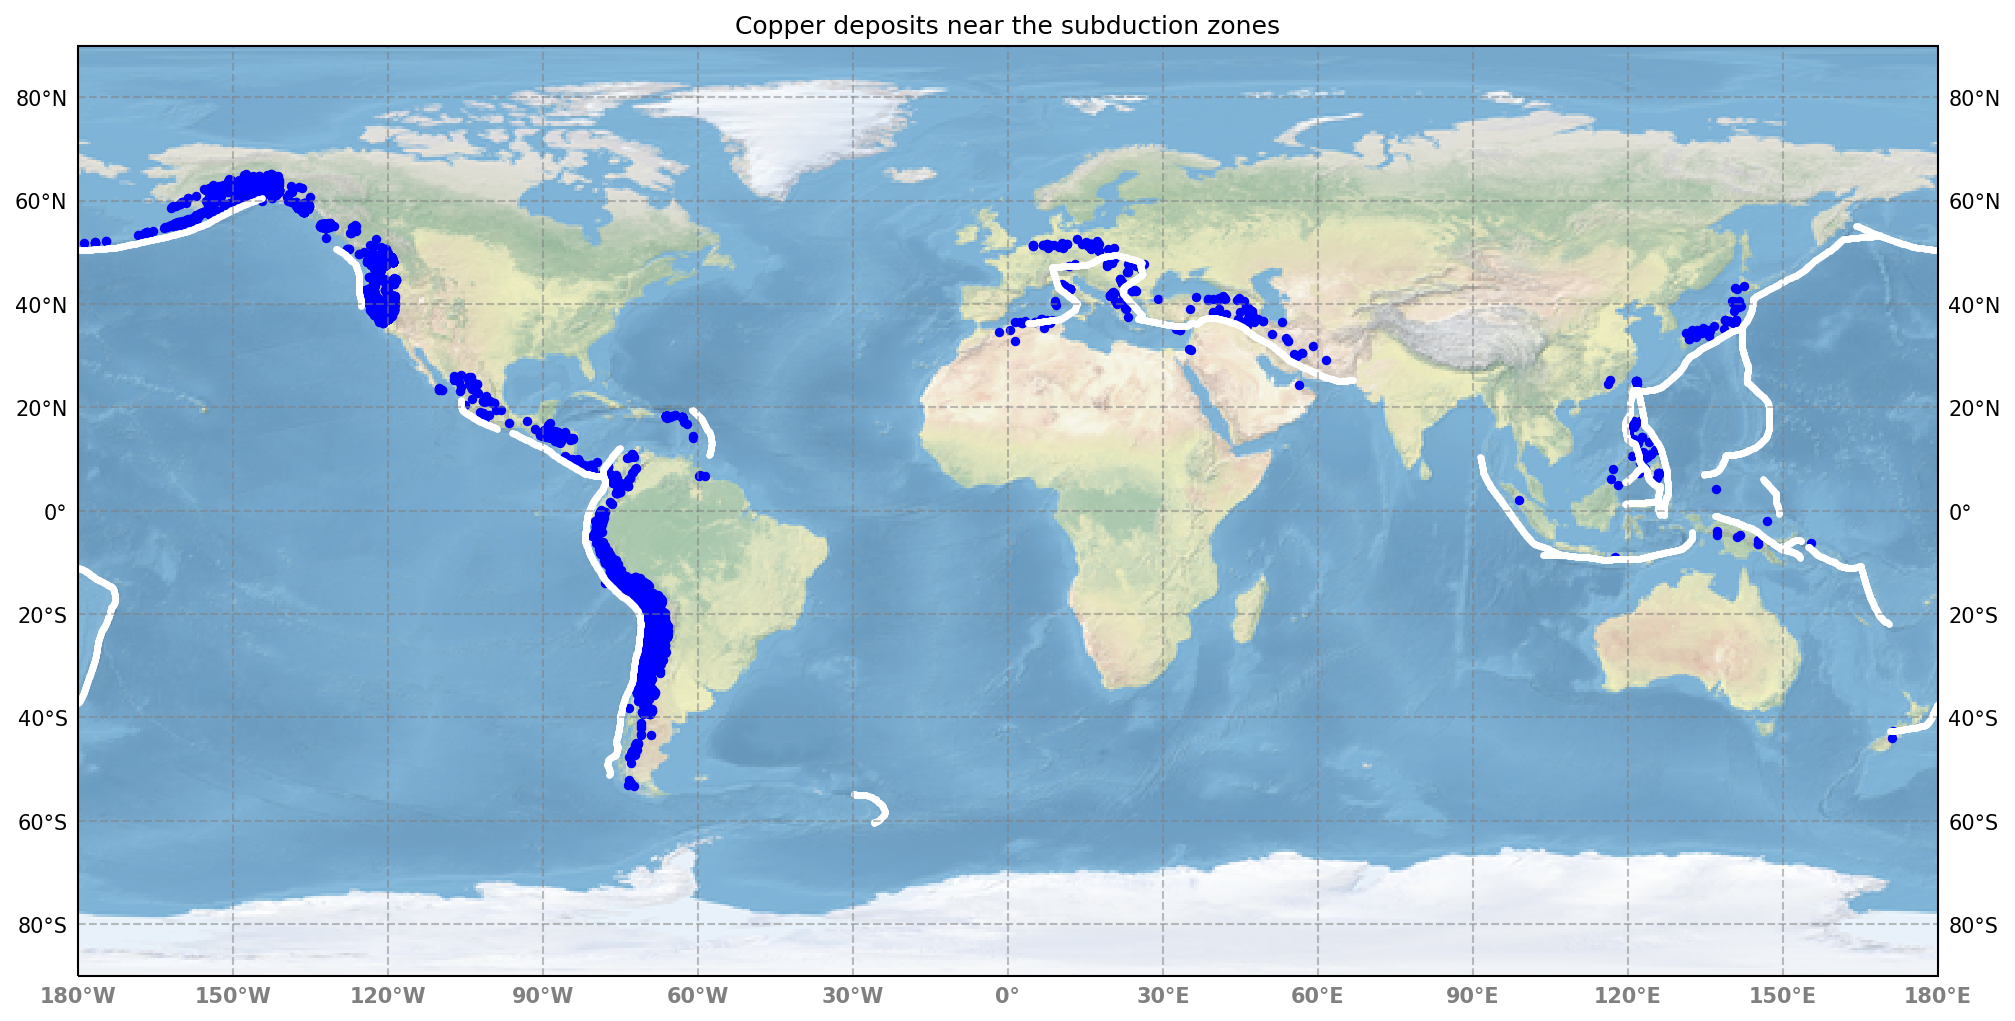

In [5]:
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

#plot the data
data=np.genfromtxt('mrds_copper.csv', delimiter='\t', skip_header=1)

fig = plt.figure(figsize=(16,12),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlocator = mticker.FixedLocator([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'gray', 'weight': 'bold'}

ax.stock_img()
ax.set_extent([-180, 180, -90, 90])
cb = ax.scatter(data[:,0], data[:,1], 50, marker='.',c='blue')
ax.scatter(trench_data[:,0], trench_data[:,1], 20, marker='.', color='white')
plt.title('Copper deposits near the subduction zones')
#fig.colorbar(cb, shrink=0.5)
plt.show()

#### This is the end of step 1 and now open the step 2 notebook
[2_Generate_Subduction_Convergence_Kinematics_Statistics.ipynb](2_Generate_Subduction_Convergence_Kinematics_Statistics.ipynb)